# 【PyTorch】Pythonで時間波形からメルスペクトログラムへ変換【librosa】
https://take-tech-engineer.com/pytorch-librosa-melspec/

In [1]:
import os
import requests
import librosa
import matplotlib.pyplot as plt

# 音声の保存
_SAMPLE_DIR = "_sample_data"
SAMPLE_WAV_URL = "https://pytorch-tutorial-assets.s3.amazonaws.com/VOiCES_devkit/source-16k/train/sp0307/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
SAMPLE_WAV_PATH = os.path.join(_SAMPLE_DIR, "speech.wav")

os.makedirs(_SAMPLE_DIR, exist_ok=True)

with open(SAMPLE_WAV_PATH, 'wb') as f:
    f.write(requests.get(SAMPLE_WAV_URL).content)


# メルスペクトログラム表示用関数
def plot_melspectrogram(spec, title=None, ylabel="mel_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Mel Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

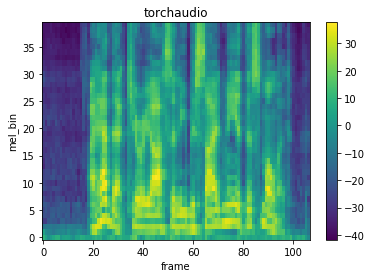

In [2]:
import torch
import torchaudio
import torchaudio.transforms as T

waveform, sample_rate = torchaudio.load(filepath=SAMPLE_WAV_PATH)

sample_rate=sample_rate
n_mels = 40
n_fft = 1024
win_length = None
hop_length = 512
window_fn = torch.hann_window

spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    n_mels=n_mels,
    win_length=win_length,
    hop_length=hop_length,
    window_fn=window_fn,
    power=2.0,
)

spec = spectrogram(waveform)

plot_melspectrogram(spec[0], title='torchaudio')

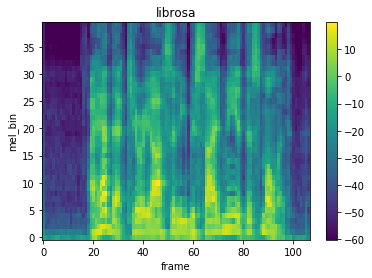

In [3]:
import numpy as np

waveform, sample_rate = librosa.load(SAMPLE_WAV_PATH, sr=None, mono=False)

sr = sample_rate
n_mels = 40
n_fft = 1024
win_length = None
hop_length = 512
window_fn = 'hann'

spec = librosa.feature.melspectrogram(y=waveform, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window_fn)

plot_melspectrogram(spec, title='librosa')